In [288]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import os
import plotly.express as px


# Data Insights

## Introduction

track_name - Name of the track

artist_name - Name of the artist

artist_pop - Popularity of the artist

album - Name of the album

track_pop - Popularity of the track

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. 
Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

mode - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

key - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

speechiness - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

time_signature - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

duration_ms - The duration of the track in milliseconds.

In [289]:
os.listdir()

['.gitignore', 'tiktok_analysis.ipynb', 'TikTok_songs_2022.csv']

In [290]:
data = pd.read_csv("TikTok_songs_2022.csv")

In [291]:
data.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [292]:
# album-track name

In [293]:
data.shape

(263, 18)

In [294]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

In [295]:
data.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,64.186312,59.844106,0.715338,0.682631,-6.300513,0.536122,5.809886,0.117268,0.193188,0.020244,0.202562,0.506149,122.883696,3.969582,174656.212928
std,18.146338,24.976524,0.117722,0.141756,1.905114,0.499644,3.657312,0.101417,0.214588,0.109370,0.151808,0.220757,24.396686,0.288168,34785.125564
min,18.000000,0.000000,0.308000,0.214000,-13.468000,0.000000,0.000000,0.025200,0.000038,0.000000,0.026500,0.036300,62.948000,1.000000,85742.000000
25%,50.000000,47.000000,0.646000,0.593000,-7.423500,0.000000,2.000000,0.044750,0.028100,0.000000,0.094350,0.349000,106.850500,4.000000,148646.000000
50%,64.000000,66.000000,0.726000,0.701000,-6.067000,1.000000,6.000000,0.070700,0.120000,0.000003,0.132000,0.485000,123.056000,4.000000,171028.000000
75%,81.000000,79.500000,0.796500,0.790500,-4.887000,1.000000,9.000000,0.156000,0.298500,0.000334,0.277500,0.680000,130.004500,4.000000,199047.000000
max,95.000000,97.000000,0.961000,0.955000,-2.634000,1.000000,11.000000,0.481000,0.965000,0.939000,0.790000,0.956000,187.906000,5.000000,298933.000000


In [296]:
data.duplicated().sum()

0

In [297]:
data.isnull().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [298]:
data.isna().sum()

track_name          0
artist_name         0
artist_pop          0
album               0
track_pop           0
danceability        0
energy              0
loudness            0
mode                0
key                 0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [299]:
for index,columnName in enumerate(data.columns):
    print(index,columnName)


0 track_name
1 artist_name
2 artist_pop
3 album
4 track_pop
5 danceability
6 energy
7 loudness
8 mode
9 key
10 speechiness
11 acousticness
12 instrumentalness
13 liveness
14 valence
15 tempo
16 time_signature
17 duration_ms


## Data Visualization

In [300]:
data.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [301]:
data.key.apply('str')
data.key.dtypes

dtype('int64')

In [302]:
majorKeys = {
    0:'E Major',
    1:'B Major',
    2:'F# Major',
    3:'DFlat Major',
    4:'AFlat Major',
    5:'EFlat Major',
    6:'BFlat Major',
    7:'F Major',
    8:'C Major',
    9:'G Major',
    10:'D Major',
    11:'A Major'
}

minorKeys = {
    0:'DFlat Minor',
    1:'AFlat Minor',
    2:'EFlat Minor',
    3:'BFlat Minor',
    4:'F Minor',
    5:'C Minor',
    6:'G Minor',
    7:'D Minor',
    8:'A Minor',
    9:'E Minor',
    10:'B Minor',
    11:'F# Minor'
}

In [303]:
data.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [304]:
data['mode'].replace({
    0:'minor',
    1:'major'
},inplace=True)

data.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,minor,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,minor,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,major,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,major,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,minor,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [305]:

data['key'].replace(minorKeys,inplace=True)
data.head()


# def replaceKey(df):
#     if df['mode'] == 'minor':
#         return df['key'].replace(minorKeys,True)
#     else:
#         return df['key'].replace(majorKeys,True)


# data.apply(replaceKey,axis=1)

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,minor,B Minor,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,minor,G Minor,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,major,B Minor,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,major,F# Minor,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,minor,B Minor,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [306]:
data['key'] = np.where(data['mode']=='minor', data['key'].replace(minorKeys,inplace=True), data['key'].replace(majorKeys,inplace=True))
data.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,minor,None,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,minor,None,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,major,None,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,major,None,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,minor,None,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [307]:
grouped = data.groupby('artist_name')
groupedArtistDurations = grouped.duration_ms.sum()

In [308]:
fig = px.bar( x=groupedArtistDurations.index, y=groupedArtistDurations.values, labels={'x':'Artist Name', 'y':'Duration (ms)'},
color=groupedArtistDurations.values, color_continuous_scale=px.colors.sequential.thermal_r, title='Artist Duration (ms)')
fig.show()


In [309]:
px.histogram(data, x='valence', nbins=110, labels={'valence':'Valence'}
,title='Valence(All Data)').show()

In [313]:
px.histogram(data, x='tempo', nbins=100, labels={'tempo':'Tempo'}, text_auto='.2s',
title='Tempo(All Data)')


In [311]:
data.key.value_counts()

Series([], Name: key, dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

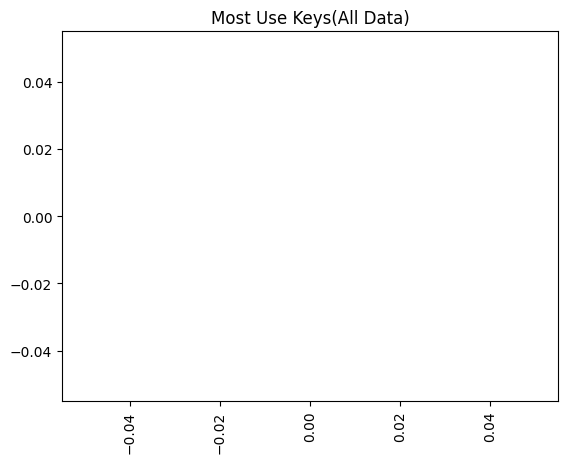

In [312]:
data['key'].value_counts().plot(kind='bar', title='Most Use Keys(All Data)',
color='red').set(xlabel='Key', ylabel='Count');

In [ ]:
fig = px.bar(data, y=data.key.unique(), x=data.key.value_counts(), 
orientation='h', 
color=data.key.value_counts(),
color_continuous_midpoint=15, 
color_continuous_scale=px.colors.sequential.Bluered_r,
title='Most Use Keys(All Data)',
labels={'y':'Key', 'x':'Count'})

fig.show()

In [ ]:
# araştırılması gerekilen sütun araştırılır (domain?)

In [ ]:
# veri bilimcinin araştırma

In [ ]:
data.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


# Shapiro-Wilk Test

In [ ]:
tempo = data['tempo']

In [ ]:
from scipy.stats import shapiro
dataTempo = tempo
stat, p = shapiro(dataTempo)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian(normal-dist)')

stat=0.956, p=0.000
Probably not Gaussian(normal-dist)


In [ ]:
data

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.350000,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.440000,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.099500,0.000000,0.3350,0.722,108.966,4,191822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320
259,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365
261,Good Looking,Suki Waterhouse,64,Good Looking,80,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,3,214800


In [ ]:
data.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [ ]:
newdf = data.select_dtypes(include=numerics)


In [ ]:
newdf.head()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,81,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,91,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,73,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,80,89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,81,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


In [ ]:
for i in newdf.columns:
    print([i])
    alpha = 0.05
    a, b = scipy.stats.normaltest(data[[i]])
    print(a, b)
    if b < alpha:
        print("The null hypothesis can be rejected. (Not normal distributed)\n")
    else:
        print("The null hypothesis cannot be rejected. (Normal distributed)\n")


['artist_pop']
[36.84461597] [9.98374081e-09]
The null hypothesis can be rejected. (Not normal distributed)

['track_pop']
[30.76008669] [2.09185724e-07]
The null hypothesis can be rejected. (Not normal distributed)

['danceability']
[20.79656986] [3.04847216e-05]
The null hypothesis can be rejected. (Not normal distributed)

['energy']
[10.39635694] [0.00552662]
The null hypothesis can be rejected. (Not normal distributed)

['loudness']
[24.50920939] [4.76313403e-06]
The null hypothesis can be rejected. (Not normal distributed)

['mode']
[1300.57995373] [3.8251759e-283]
The null hypothesis can be rejected. (Not normal distributed)

['key']
[195.19073482] [4.11974632e-43]
The null hypothesis can be rejected. (Not normal distributed)

['speechiness']
[71.74309323] [2.63745615e-16]
The null hypothesis can be rejected. (Not normal distributed)

['acousticness']
[66.14961778] [4.32307738e-15]
The null hypothesis can be rejected. (Not normal distributed)

['instrumentalness']
[375.12482401]

Numeric columns in "newdf" are not normally distributed so we can only use non-parametric tests.

In [ ]:
data.columns

Index(['track_name', 'artist_name', 'artist_pop', 'album', 'track_pop',
       'danceability', 'energy', 'loudness', 'mode', 'key', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'duration_ms'],
      dtype='object')

In [ ]:
data.head()

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822
